**Name:** Veljko Kovac

# Text Document Classification with Naive Bayes, Multinomial NB
We will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

## 1. Loading the 20 Newsgroups Dataset
The dataset is called “20 Newsgroups”. Here is the official description, quoted from the [website](http://qwone.com/~jason/20Newsgroups/)
>The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

In [1]:
# %matplotlib inline
# import IPython.core.display         
# setup output image format (Chrome works best)
# IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
random.seed(100)

- Extract 4 classes ('alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space') from the dataset. 

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


- Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


- Show the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

## 2. Extracting Features


#### Bag of Words


Because one-hot encoding is impractical when the scale of corpus become large we will use Bag of Words.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
	'This document is the second document.',
	'And this is the third one.',
	'Is this the first document?']
 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
 
print(vectorizer.get_feature_names())
print(X.toarray())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Term Frequency - Inverse Document Frequency (TF-IDF)

In the word bag model, we can get the vector representation of this text. However, in the face of the diversity of text, each word has different weight to the content of text in practical application, so we introduce tf-idf model.

In [7]:
vectorizer = CountVectorizer(stop_words = 'english')
train_X = vectorizer.fit_transform(newsgroups_train.data)
train_Y = newsgroups_train.target

test_X = vectorizer.transform(newsgroups_test.data)
test_Y = newsgroups_test.target




## 3. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set. 

In [8]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.0000000001, binarize=0.0, fit_prior=True)
bnb.fit(train_X, train_Y)
bnb_score = bnb.score(test_X, test_Y)
print(bnb_score)

0.7354028085735402


What are the most informative words for each category? 


In [9]:
# get the word names
fnames = asarray(vectorizer.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bnb.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bnb.coef_[i][t]))

class alt.atheism
    time      (-1.80434)
    know      (-1.60944)
    does      (-1.60944)
    god       (-1.58882)
    like      (-1.54881)
    say       (-1.52940)
    just      (-1.45529)
    think     (-1.39466)
    people    (-1.29859)
    don       (-1.19018)
class comp.graphics
    just      (-1.95106)
    don       (-1.91555)
    program   (-1.88126)
    need      (-1.85904)
    does      (-1.74493)
    use       (-1.73517)
    like      (-1.60773)
    know      (-1.51009)
    graphics  (-1.49470)
    thanks    (-1.47206)
class sci.space
    earth     (-1.90786)
    use       (-1.88538)
    time      (-1.77007)
    know      (-1.73123)
    think     (-1.73123)
    nasa      (-1.73123)
    don       (-1.69385)
    just      (-1.47254)
    like      (-1.41538)
    space     (-1.01922)
class talk.religion.misc
    say       (-1.65558)
    way       (-1.62818)
    like      (-1.61476)
    does      (-1.53780)
    know      (-1.48959)
    think     (-1.42139)
    god       (-1.378

## 4. Multinomial Naive Bayes model


In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = feature_extraction.text.TfidfTransformer(use_idf=True, norm= 'l1')
# tfidf_vec = TfidfVectorizer(stop_words = 'english')


train_Xtf = tfidf.fit_transform(train_X)
train_Ytf = newsgroups_train.target

test_Xtf = tfidf.transform(test_X)
test_Ytf = newsgroups_test.target

mnbtf = naive_bayes.MultinomialNB(alpha= 0.00001)
mnbtf.fit(train_Xtf, train_Ytf)
mnb_scoretf = mnbtf.score(test_Xtf, test_Ytf)
print(mnb_scoretf)



0.7745750184774575


Most informative features for Multinomial model

In [11]:
# get the word names
fnames = asarray(vectorizer.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mnbtf.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mnbtf.coef_[i][t]))

class alt.atheism
    religion  (-5.83338)
    objective (-5.78422)
    does      (-5.74496)
    say       (-5.65497)
    think     (-5.53829)
    people    (-5.52207)
    don       (-5.43390)
    deletion  (-5.28648)
    god       (-5.21390)
    just      (-5.19335)
class comp.graphics
    program   (-5.70729)
    hi        (-5.70259)
    does      (-5.64738)
    image     (-5.61039)
    looking   (-5.60881)
    know      (-5.53253)
    file      (-5.47213)
    files     (-5.47115)
    graphics  (-5.06724)
    thanks    (-5.04180)
class sci.space
    real      (-6.18004)
    launch    (-6.10616)
    moon      (-6.08765)
    think     (-6.08691)
    orbit     (-6.03855)
    thanks    (-5.99905)
    just      (-5.88955)
    like      (-5.78827)
    nasa      (-5.76848)
    space     (-4.98162)
class talk.religion.misc
    think     (-5.87438)
    just      (-5.87425)
    wrong     (-5.87405)
    don       (-5.85587)
    objective (-5.83855)
    people    (-5.76136)
    christian (-5.701

## 5. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance. 

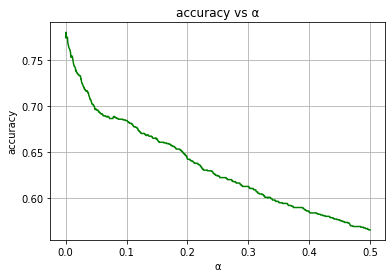

The best α is: 0.0005104904904904905
The best accuracy is: 0.7804878048780488


In [12]:
score_array = []


for a in linspace(0.00001,0.5,1000):
    mnbtf = naive_bayes.MultinomialNB(alpha= a)
    mnbtf.fit(train_Xtf, train_Ytf)
    mnb_scoretf = mnbtf.score(test_Xtf, test_Ytf)
    score_array.append(mnb_scoretf)
X = linspace(0.00001,0.5,1000)
Y = score_array
plt.plot(X,Y,'g-')
plt.grid(True)
plt.xlabel('α');plt.ylabel('accuracy')
plt.title("accuracy vs α")
plt.show()
print("The best α is: "+str(X[Y.index(max(Y))]))
print("The best accuracy is: "+str(max(Y)))

## 6. Effect of vocabulary size
The vocabulary size also affects the accuracy. 

The biggest accuracy is obtained with: 24713.428571428572 number of features.
The biggest accuracy obtained is: 0.7745750184774575


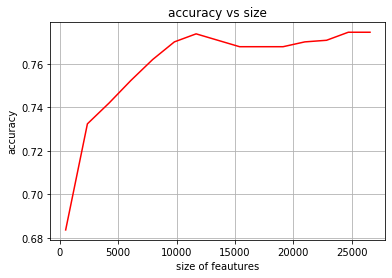

In [13]:
score_arr_size = []
max_size_features = len(vectorizer.get_feature_names())
for size in linspace(500,max_size_features,15):
    vectorizer = CountVectorizer(stop_words = 'english', max_features = int(size))
    
    train_X = vectorizer.fit_transform(newsgroups_train.data)
    train_Y = newsgroups_train.target

    test_X = vectorizer.transform(newsgroups_test.data)
    test_Y = newsgroups_test.target
    
    tfidf = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    train_Xtf = tfidf.fit_transform(train_X)
    test_Xtf = tfidf.transform(test_X)
    mnbtf = naive_bayes.MultinomialNB(alpha= 0.00001)
    mnbtf.fit(train_Xtf, train_Y)
    
    mnb_scoretf = mnbtf.score(test_Xtf, test_Y)
    score_arr_size.append(mnb_scoretf)

X = linspace(500,max_size_features,15)
Y = score_arr_size
plt.plot(X,Y,'r')
plt.grid(True)
print("The biggest accuracy is obtained with: "+str(X[Y.index(max(Y))])+" number of features.")
print("The biggest accuracy obtained is: "+str(max(Y)))
plt.title("accuracy vs size")
plt.xlabel("size of feautures")
plt.ylabel("accuracy")
plt.show()